# K-Nearest Neighbors (KNN) and Linear Classifier Tutorial

In this tutorial, we will implement two fundamental classification algorithms:
1. **K-Nearest Neighbors (KNN)**: A simple, instance-based learning algorithm.
2. **Linear Classifier**: One of the simplest machine learning models used for classification.

## Objectives:
- Generate two dimensional synthetic data
- Download and subsample CIFAR dataset
- Implement KNN and Linear Classifiers from scratch.
- Use `scikit-learn` to apply both classifiers to a dataset.
- Visualize decision boundaries and evaluate model performance.

Refrences: https://cs231n.github.io/classification/

## Install Required Libraries

In [1]:
# In our server we dont have preinstalled libraries, so you may want to run this to install!!
!pip install scikit-learn
!pip install torch torchvision matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Import Library

In [2]:
#Import Necessary Library
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
# from torchvision.datasets import CIFAR10

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.spatial import distance
# from sklearn.datasets import fetch_openml

# Using the default libraries function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Generating and Visualizing the Synthetic data points

In [3]:
# Generating synthetic dataset
X_syn, y_syn = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

In [4]:
# To get unique values in y
unique_train_classes = np.unique(y_train_syn)
unique_test_classes = np.unique(y_test_syn)
print(unique_train_classes)

# Check if the unique classes in both arrays are equal
assert np.array_equal(unique_train_classes, unique_test_classes), "Unique classes in train and test sets are different."
# NumPy arrays do not support direct comparison for equality! Instead we should use array_equal function!

[0 1]


In [5]:
X_train_syn[0] , y_train_syn[0]

(array([-0.18255715, -2.46164759]), np.int64(0))

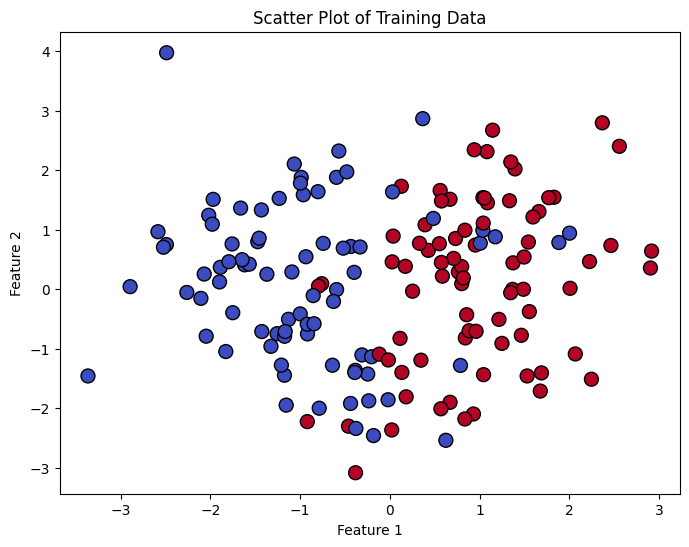

In [6]:
# Plot the data for training set
plt.figure(figsize=(8, 6))
plt.scatter(X_train_syn[:, 0], X_train_syn[:, 1], c=y_train_syn, cmap='coolwarm', edgecolor='k', s=100)
plt.title("Scatter Plot of Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

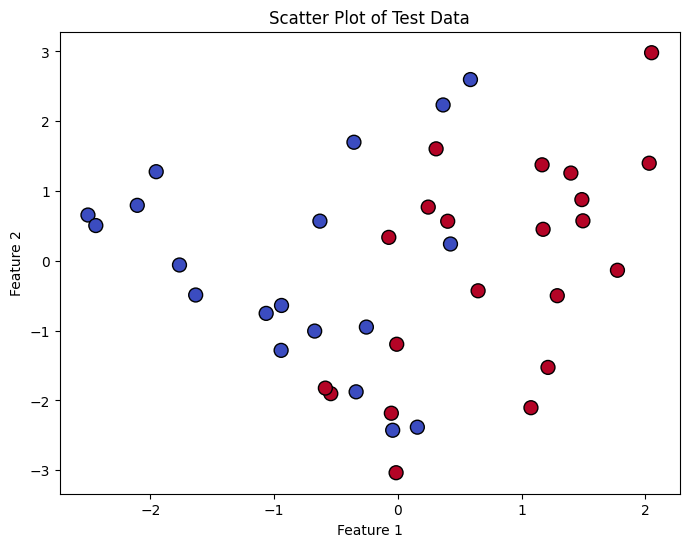

In [7]:
# Plot the data for test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test_syn[:, 0], X_test_syn[:, 1], c=y_test_syn, cmap='coolwarm', edgecolor='k', s=100)
plt.title("Scatter Plot of Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# K-Nearest Neighbors (KNN) Classifier Tutorial

## Background

The K-Nearest Neighbors (KNN) classifier is a straightforward and intuitive machine learning algorithm used for classification tasks. It operates based on the principle of finding the 'K' closest training examples in the feature space to a given test example and classifying it based on the majority class among these 'K' neighbors.

### Key Concepts

- **Distance Metric**: KNN uses distance metrics to find the closest neighbors. Common distance metrics include:

  - **Euclidean Distance**: Measures the straight-line distance between two points.
  - **Manhattan Distance**: Measures the distance between two points along axes at right angles.
  - **Minkowski Distance**: Generalization of both Euclidean and Manhattan distances.


- **Choosing K**: The value of 'K' determines how many neighbors are considered for classifying a test instance:

  - **Small K**: Can make the model sensitive to noise in the data.
  - **Large K**: Can make the model less sensitive to local patterns and more computationally expensive.


- **Lazy Learning**: KNN is a lazy learner because it does not build a model during the training phase. Instead, it stores the training dataset and performs computation during the testing phase.

## Implementation

In this tutorial, we will:

1. Implement a custom KNN classifier.
2. Train and evaluate the classifier.


In [8]:
# Custom KNN Classifier
class CustomKNNClassifierCPU():
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Calculate the Euclidean Distance with each training sample
            distances = [distance.euclidean(x, x_train) for x_train in self.X_train]
            # Sort the distances and get k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # Find the labels of these nearest samples
            # k_nearest_labels = [self.y_train[i] for i in k_indices] 
            k_nearest_labels = self.y_train[k_indices]
            # Find the majority of repeated labels
            most_common = np.bincount(k_nearest_labels).argmax()
            # Append the prediction
            y_pred.append(most_common)
        return np.array(y_pred)

In [9]:
# Training the KNN
knn = CustomKNNClassifierCPU(k=5)
knn.fit(X_train_syn, y_train_syn)

# Predicting
y_pred = knn.predict(X_test_syn)

# Evaluation
print("Custom KNN Accuracy:", accuracy_score(y_test_syn, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_syn, y_pred))

Custom KNN Accuracy: 0.8
Confusion Matrix:
 [[15  4]
 [ 4 17]]


In [10]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.show()

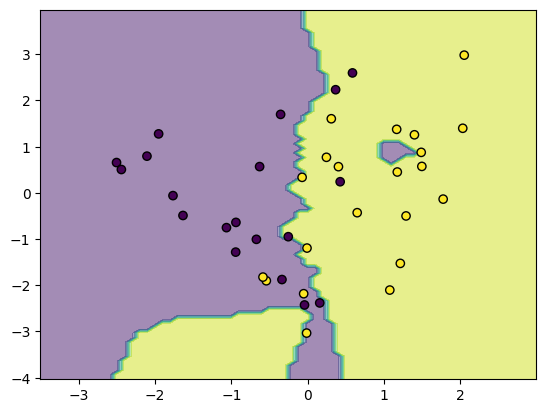

In [11]:
# Plotting decision boundary for KNN
plot_decision_boundary(knn, X_test_syn, y_test_syn)

In [12]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [13]:
!nvidia-smi

Sat Sep 27 04:27:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:84:00.0 Off |                  N/A |
| 24%   34C    P8             23W /  250W |       4MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
print("GPU available: ", torch.cuda.is_available())
print("Number of GPUs: ", torch.cuda.device_count())

GPU available:  True
Number of GPUs:  4


In [15]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Jan__6_16:45:21_PST_2023
Cuda compilation tools, release 12.0, V12.0.140
Build cuda_12.0.r12.0/compiler.32267302_0


## LETS GET OUR HAND DIRTY ON IMAGE DATA NOW!!

In [16]:
# Desired mean and standard deviation for the normalization of inputs!
mean = 0.0
stddev = 1.0

# Define Transformation for input image. You may be able to use many more transform using this.
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean), (stddev))])

# This is equivalent to standard scalar funtion from sklearn.preprocessing But you can define own

In [17]:
cifar_train = datasets.CIFAR10('./data', train=True, download=True ,transform=transforms.ToTensor())
cifar_test = datasets.CIFAR10('./data', train=False, download=True ,transform=transforms.ToTensor())

Training data: 50000
Test data: 10000
Image shape: torch.Size([3, 32, 32])
Image shape after transformation: (32, 32, 3)


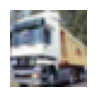

label: truck


In [18]:
print(f"Training data: {len(cifar_train)}")
print(f"Test data: {len(cifar_test)}")

image, label = cifar_train[1]
# Now you can check the shape of the image
print(f"Image shape: {image.shape}")

# If the image is in [C, H, W] format, we need to permute it to [H, W, C] for displaying
image_np = image.permute(1, 2, 0).cpu().numpy()
print(f"Image shape after transformation: {image_np.shape}")

# print(image_np)  -- You will able to see that image is in range [0,1]

# Ensure it's in the right range [0, 255] for displaying
image_np = (image_np * 255).astype('uint8')

# Display the image
plt.figure(figsize=(1,1))
plt.imshow(image_np)
plt.axis('off')  # Turn off axis labels
plt.show()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"label: {classes[label]}")

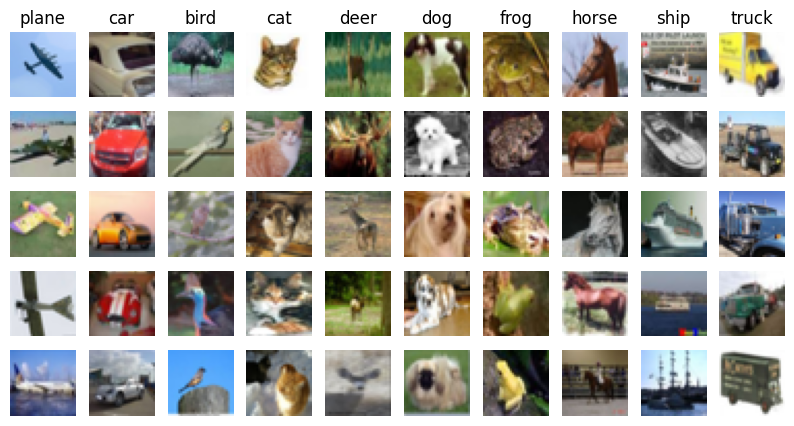

In [19]:
# Classes of CIFAR DATA
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

# Collect labels and images for the CIFAR dataset
images, labels = [], []
for image, label in cifar_train:
    images.append(image)
    labels.append(label)

images = torch.stack(images)
labels = torch.tensor(labels)

# Now plotting the samples
plt.figure(figsize=(10, 5))  # Adjust the width and height to your preference

for y, cls in enumerate(classes):
    # Find indices of samples belonging to class `y`
    idxs = np.flatnonzero(labels == y)
    # Randomly choose some sample indices
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        
        # Convert tensor to NumPy and plot
        img_np = (images[idx].permute(1, 2, 0).cpu().numpy()*255).astype('uint8')  # Convert from [C, H, W] to [H, W, C]
        plt.imshow(img_np)
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

## USE A PART OF DATA (SUBSAMPLING)

In [20]:
# Function to subsample CIFAR-10 dataset
def subsample_dataset(dataset, sample_size=1000):
    indices = np.random.choice(len(dataset), sample_size, replace=False)
    subset = Subset(dataset, indices)
    return subset

# Subsample the training and test datasets
sample_size = 1000
train_subset = subsample_dataset(cifar_train, sample_size=sample_size)
test_subset = subsample_dataset(cifar_test, sample_size=int(sample_size * 0.4))

# Load data into PyTorch DataLoader
train_loader = DataLoader(train_subset, batch_size=sample_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=int(sample_size * 0.4), shuffle=False)

# Fetch all data and labels for easier handling
X_train, y_train = next(iter(train_loader))
X_test, y_test = next(iter(test_loader))

print("Before Flattening")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Reshape the images to 2D for the KNN algorithm
X_train = X_train.view(X_train.size(0), -1).to(device)  # Flatten
X_test = X_test.view(X_test.size(0), -1).to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

print("After Flattening")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Before Flattening
Training data shape: torch.Size([1000, 3, 32, 32])
Test data shape: torch.Size([400, 3, 32, 32])
After Flattening
Training data shape: torch.Size([1000, 3072])
Test data shape: torch.Size([400, 3072])


In [21]:
class CustomKNNClassifierGPU:
    def __init__(self, k=3, num_classes=10, chunk_size=256):
        self.k = k
        self.num_classes = num_classes
        self.chunk_size = chunk_size            # Splits test data into chunks to control memory.
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: torch.Tensor, y_train: torch.Tensor):   
        # X_train: [N, D] float tensor on device
        # y_train: [N] long tensor on same device
        assert isinstance(X_train, torch.Tensor)
        assert isinstance(y_train, torch.Tensor)
        assert X_train.device == y_train.device
        self.X_train = X_train
        self.y_train = y_train.long()

    @torch.no_grad()                                                # Saves Memory
    def predict(self, X_test: torch.Tensor) -> torch.Tensor:
        assert self.X_train is not None and self.y_train is not None
        assert X_test.device == self.X_train.device

        preds = []                                               # to collect batch predictions.
        N = X_test.size(0)                                       # num of test samples
        for start in range(0, N, self.chunk_size):
            end = min(start + self.chunk_size, N)                # End index for this chunk.
            xb = X_test[start:end]                               # [B, D] Slice a batch of B test vectors with D features.
            dists = torch.cdist(xb, self.X_train, p=2)           # [B, N] B rows (test items) by N columns (train items).
            _, idx = torch.topk(dists, k=self.k, largest=False)  # [B, k] For each test item, get indices of the k smallest distances.
            neigh_labels = self.y_train[idx]                     # [B, k] Gather labels of those neighbors using indices.

            # Majority vote per row
            batch_pred = []
            for row in neigh_labels:                                      # row: [k] Loop over each test item’s k labels.
                counts = torch.bincount(row, minlength=self.num_classes)  # Count label frequency across the k neighbors.
                batch_pred.append(torch.argmax(counts))                   # Pick the label with the highest count.
            preds.append(torch.stack(batch_pred))

        return torch.cat(preds).to(X_test.device)                # [N]

In [22]:
# Initialize and train custom KNN classifier
if device.type == 'cuda':
    knn = CustomKNNClassifierGPU(k=5)
else:
    knn = CustomKNNClassifierCPU(k=5)

knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test, y_pred.cpu().numpy() if isinstance(y_pred, torch.Tensor) else y_pred)
print(f"Accuracy of Custom KNN Classifier: {accuracy:.2f}")

Accuracy of Custom KNN Classifier: 0.24


## USING SKLEARN KNeighborsClassifier

In [23]:
# SKLEARN needs the data in cpu
X_train_np = X_train.detach().cpu().numpy()
y_train_np = y_train.detach().cpu().numpy()
X_test_np = X_test.detach().cpu().numpy()
y_test_np = y_test.detach().cpu().numpy()

In [24]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train_np, y_train_np)

# Predicting
y_pred_sklearn = knn_sklearn.predict(X_test_np)

# Evaluation
print("sklearn KNN Accuracy:", accuracy_score(y_test_np, y_pred_sklearn))
print("Confusion Matrix (sklearn KNN):\n", confusion_matrix(y_test_np, y_pred_sklearn))

sklearn KNN Accuracy: 0.2175
Confusion Matrix (sklearn KNN):
 [[20  0  6  0  2  0  0  0 10  0]
 [11  4  2  4  1  2  0  0  8  1]
 [10  0 15  2 14  1  0  0  1  0]
 [ 4  0 13  4 11  2  3  0  3  0]
 [ 3  0 21  0 10  1  1  1  2  0]
 [ 9  0  6  7  7  8  2  0  1  0]
 [ 0  1 20  5 12  0  2  0  0  0]
 [ 7  0 12  4 10  1  1  3  2  1]
 [15  0  6  1  3  1  2  0 15  0]
 [ 9  5  2  2  5  4  0  0 10  6]]


## (kNN was developed in 1951).

In particular, note that images that are nearby each other are much more a function of the general color distribution of the images, or the type of background rather than their semantic identity. For example, a dog can be seen very near a frog since both happen to be on white background. Ideally we would like images of all of the 10 classes to form their own clusters, so that images of the same class are nearby to each other regardless of irrelevant characteristics and variations (such as the background). However, to get this property we will have to go beyond raw pixels.

# Linear Classifier: Perceptron 


## Components:

1. **Linear Output:**
   The linear combination of inputs and weights plus the bias is given by:
$$
\mathbf{y_i} = \mathbf{x_i} \cdot \mathbf{w} + b
$$

- $\mathbf{x_i}$: Input feature vector.
- $\mathbf{w}$: Weight vector.
- $b$: Bias term.


## Update Rule:

When an error is detected, update the weights and bias as follows:

- **Weight Update:**

  $$
  \mathbf{w} \leftarrow \mathbf{w} + \text{lr} \cdot y_i \cdot \mathbf{x_i}
  $$

  - $\text{lr}$: Learning rate.
  - $y_i$: True label (mapped to -1 or 1).
  - $\mathbf{x_i}$: Input feature vector.


- **Bias Update:**
  $$
  b \leftarrow b + \text{lr} \cdot y_i
  $$

  - $y_i$: True label (mapped to -1 or 1).

## Explanation:

1. **Weight Update:**
   - When a prediction is incorrect, the weight adjustment $\text{lr} \cdot y_i \cdot \mathbf{x_i}$ helps to move the decision boundary closer to the correct classification. If the prediction was too low, increasing the weights for the features of the misclassified sample corrects the prediction.

2. **Bias Update:**
   - The bias is adjusted similarly to shift the decision boundary. The adjustment is proportional to the true label, ensuring the bias is moved in a way that reduces error.

## Summary:

The Perceptron updates weights and bias iteratively based on errors, with adjustments proportional to the learning rate. This process continues for a specified number of iterations or until the model converges.


In [25]:
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)          # Zero initialization - There are better ways to do it! Explore Xavier Initialization
        self.bias = 0
        # Map labels to -1 and 1 for binary classification
        y_ = np.where(y == 0, -1, 1)  #True label mapped to -1 and 1

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                
                # Update rule - 
                # The condition checks if the product of the true label and the linear output is less than or equal to 0, 
                # Indictes a misclassification (i.e., the sign of the prediction does not match the true label).
                
                if y_[idx] * linear_output <= 0:   
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]

    def predict(self, X):
        predictions = np.sign(np.dot(X, self.weights) + self.bias)
        # Map -1 to 0
        predictions[predictions == -1] = 0
        return predictions

In [26]:
# Training the Perceptron
perceptron = CustomPerceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X_train_syn, y_train_syn)

# Predicting
y_pred_perceptron = perceptron.predict(X_test_syn)

# Evaluation
print("Custom Perceptron Accuracy:", accuracy_score(y_test_syn, y_pred_perceptron))
print("Confusion Matrix:\n", confusion_matrix(y_test_syn, y_pred_perceptron))


Custom Perceptron Accuracy: 0.75
Confusion Matrix:
 [[15  4]
 [ 6 15]]


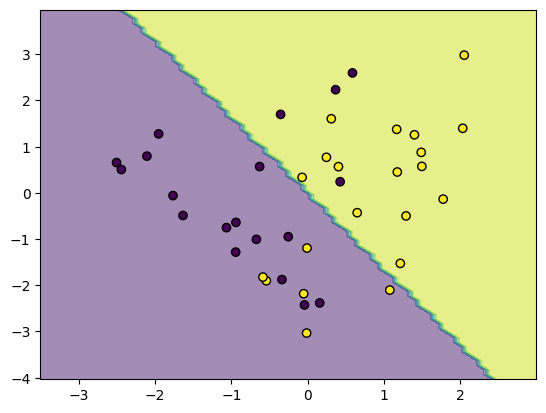

In [27]:
plot_decision_boundary(perceptron, X_test_syn, y_test_syn)

### USING SKLEARN IMPLEMENTATION

In [30]:
linear_clf = LogisticRegression()
linear_clf.fit(X_train_syn, y_train_syn)

# Predicting
y_pred_linear = linear_clf.predict(X_test_syn)

# Evaluation
print("Linear Classifier Accuracy (sklearn):", accuracy_score(y_test_syn, y_pred_linear))
print("Confusion Matrix (Linear Classifier):\n", confusion_matrix(y_test_syn, y_pred_linear))

Linear Classifier Accuracy (sklearn): 0.8
Confusion Matrix (Linear Classifier):
 [[14  5]
 [ 3 18]]


### Why sklearn is faster??

Short answer:
- scikit-learn is faster because it removes Python loops and calls optimized C or Cython with BLAS. Your code loops in Python over classes, epochs, and samples, which is slow.

Main reasons

Tight loops in Python, triple nested loops add overhead.

scikit-learn uses vectorized math, cache friendly memory, and compiled code.

Better data handling, dtype control, and shuffling.

Efficient stopping rules and learning rate handling.

### For our CIFAR DATA, we need to handle multiple classes!

In [28]:
class MultiClassPerceptronCPU:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.classes_ = None                       # For multi-class

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)              # Handle multiclass
        n_classes = len(self.classes_)
        
        self.weights = np.zeros((n_classes, n_features))  # Initialization - weight
        self.bias = np.zeros(n_classes)
        
        for c in self.classes_:
            y_binary = np.where(y == c, 1, -1)
            for _ in range(self.n_iters):
                for idx, x_i in enumerate(X):
                    # Convert x_i to np.array if not already
                    x_i = np.array(x_i, dtype=np.float32)
                    linear_output = np.dot(x_i, self.weights[c]) + self.bias[c]
                    if y_binary[idx] * linear_output <= 0:
                        self.weights[c] += self.lr * y_binary[idx] * x_i
                        self.bias[c] += self.lr * y_binary[idx]
                        
    def predict(self, X):
        # Ensure X is a NumPy array
        X = np.array(X, dtype=np.float32)
        linear_outputs = np.dot(X, self.weights.T) + self.bias
        return self.classes_[np.argmax(linear_outputs, axis=1)]


In [29]:
# Initialize and train the model
perceptron = MultiClassPerceptronCPU(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train_np, y_train_np)

# Predict on test data
y_pred = perceptron.predict(X_test_np)

# Evaluate accuracy
print("Multi-class Perceptron Accuracy:", accuracy_score(y_test_np, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test_np, y_pred))

Multi-class Perceptron Accuracy: 0.235
Confusion Matrix :
 [[11  0  6  5  1  3  0  2  7  3]
 [ 6  8  4  3  0  2  0  1  2  7]
 [ 5  2 12  4  5  4  2  3  3  3]
 [ 3  5  6  7  1  5  3  2  5  3]
 [ 2  0  7  7 10  3  1  3  2  4]
 [ 5  2  4  6  5  5  3  3  6  1]
 [ 2  2  6  5  5  6  8  1  3  2]
 [ 7  4  6  1  7  5  0  4  4  3]
 [ 9  4  3  1  1  2  3  1 19  0]
 [ 1  6  4  3  2  1  1  5 10 10]]


### USING SKLEARN IMPLEMENTATION

In [31]:
# Prepare data for Scikit-learn
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# Scale the features (important for Perceptron)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Initialize and train the Perceptron model
model = Perceptron(max_iter=1000, eta0=0.01, n_jobs=-1) # learning rate - eta0, t
model.fit(X_train_scaled, y_train_np)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
print("Scikit-learn Perceptron Accuracy:", accuracy_score(y_test_np, y_pred))

Scikit-learn Perceptron Accuracy: 0.235


#### GPU training

In [33]:
import torch.nn as nn

device = X_train.device
num_classes = 10
X_train = X_train.float()
X_test  = X_test.float()
y_train = y_train.long()
y_test  = y_test.long()

# standardize on GPU using train stats
mean = X_train.mean(dim=0, keepdim=True)
std = X_train.std(dim=0, keepdim=True).clamp_min(1e-8)
X_train_std = (X_train - mean) / std
X_test_std  = (X_test  - mean) / std

# simple “perceptron” = linear layer trained with SGD + CE
D = X_train_std.size(1)
model = nn.Linear(D, num_classes, bias=True).to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.1)
crit = nn.CrossEntropyLoss()

epochs = 30
batch_size = 256
for epoch in range(epochs):
    perm = torch.randperm(X_train_std.size(0), device=device)
    for i in range(0, X_train_std.size(0), batch_size):
        idx = perm[i:i+batch_size]
        xb, yb = X_train_std[idx], y_train[idx]
        logits = model(xb)
        loss = crit(logits, yb)
        opt.zero_grad()
        loss.backward()
        opt.step()

# eval
with torch.no_grad():
    logits = model(X_test_std)
    preds = logits.argmax(dim=1)
    acc = (preds == y_test).float().mean().item()
print(f"PyTorch GPU perceptron accuracy: {acc:.4f}")

PyTorch GPU perceptron accuracy: 0.2675


## Conclusion
In this tutorial, we:
- Implemented the K-Nearest Neighbors (KNN) algorithm from scratch.
- Implemented a simple linear classifier (perceptron).
- Used `scikit-learn` to build and evaluate both KNN and Linear Classifiers.
- Visualized the decision boundaries of both models.

KNN works by considering the nearest neighbors, while linear classifiers attempt to find a linear decision boundary between the classes.


## TAKE HOME :

- Try different learning rate and show the best result

### 1. Learning Rate
The learning rate controls how much we adjust the weights during each update. If the learning rate is too small, the Perceptron may not make significant progress. Conversely, if it's too large, it might overshoot the optimal solution.

**Action:** Experiment with different learning rates to find the optimal value.

### 2. Initialization of Weights
Proper initialization of weights and bias is crucial for the learning process. Poor initialization can lead to slow convergence or failure to converge.

**Action:** Ensure that weights and biases are initialized properly, typically with small random values.

In [ ]:
# your code here!